In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import warnings 
warnings.filterwarnings("ignore")

from matplotlib.colors import ListedColormap

In [3]:
W = np.array([0,0,0,0])#마지막 0은 b (편향) 라는것. (합쳐서 만들기 -> 계산도 빠르고 코드도 간결함.)
learning_rate = 0.01

In [15]:
def plot_decision_regions_percept(X, y, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution)) 

    Z = predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl) 
    plt.legend()
    plt.show()
    
def activation(s):
    if s > 0 : return 1     # 신호가 0보다 크면 1을 내보내고 
    elif s < 0 : return -1 # 0보다 작으면 -1
    return 0               # 0이면 0

def out(polyX):
    return activation(W.dot(polyX)) 

def train(x0, x1, target , X_plot , y_plot): 
    global W
    polyX = np.array([x0 , x1 , x0*x1 , 1]) #1 == 편향 
    y = out(polyX)
    
    plot_decision_regions_percept(X_plot , y_plot)
    if target == y: return False  #정답을 맞으면 현상태유지 . 
    
    else:
        print("가중치 수정전 target : {} y:{} ,b{}, w:{}".format(target,y,W[-1],W))
        W = W + learning_rate * polyX * target  #입력 * 출력 비례하여 가중치 변경 
        print("가중치 수정후 target : {} y:{} ,b{}, w:{}".format(target,y,W[-1],W))
        return True
    
    
def predict(inputs):
    outputs = []
    for x in inputs :          #입력상 여러개 받아서 for문돌려서 1쌍씩 꺼내와서 
        polyX = np.array([x[0] , x[1] , x[0]*x[1] , 1])
        outputs.append(out(polyX)) #outputs 에 넣겠다
    return np.array(outputs , dtype = float)


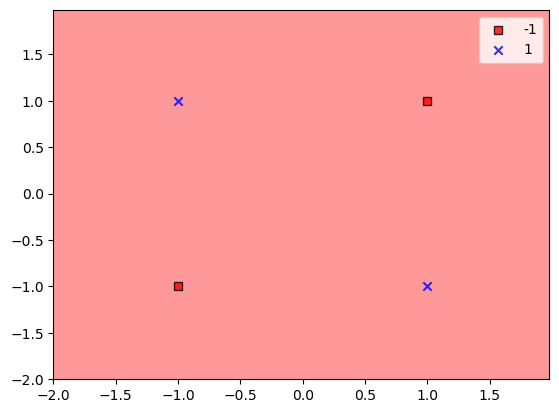

가중치 수정전 target : -1 y:0 ,b0, w:[0 0 0 0]
가중치 수정후 target : -1 y:0 ,b-0.01, w:[ 0.01  0.01 -0.01 -0.01]


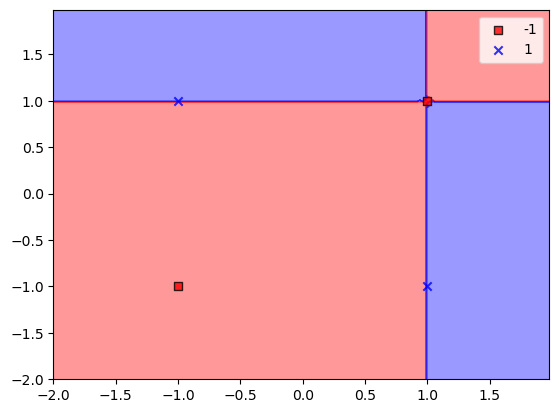

가중치 수정전 target : 1 y:0 ,b-0.01, w:[ 0.01  0.01 -0.01 -0.01]
가중치 수정후 target : 1 y:0 ,b0.0, w:[ 0.    0.02 -0.02  0.  ]


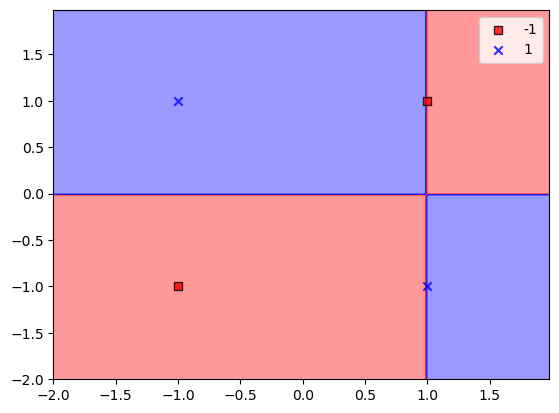

가중치 수정전 target : 1 y:0 ,b0.0, w:[ 0.    0.02 -0.02  0.  ]
가중치 수정후 target : 1 y:0 ,b0.01, w:[ 0.01  0.01 -0.03  0.01]


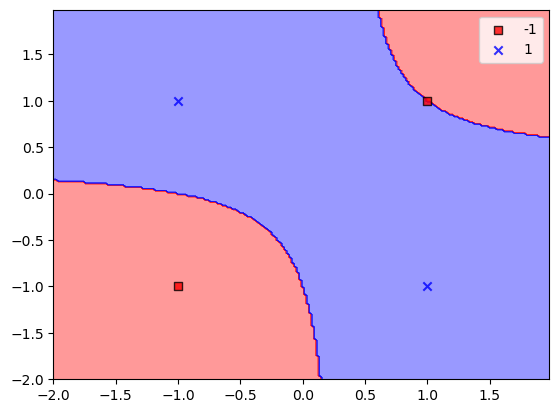

가중치 수정전 target : -1 y:1 ,b0.01, w:[ 0.01  0.01 -0.03  0.01]
가중치 수정후 target : -1 y:1 ,b0.0, w:[ 0.    0.   -0.04  0.  ]
iteration ----------------- 0


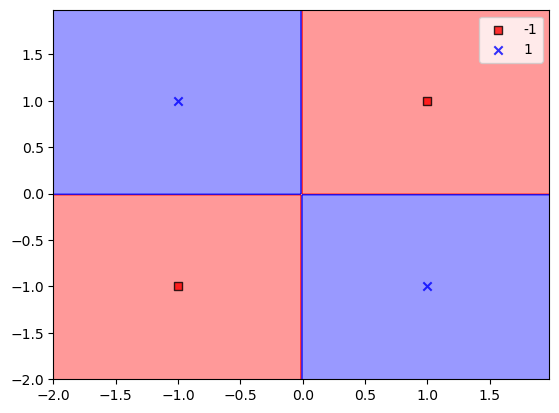

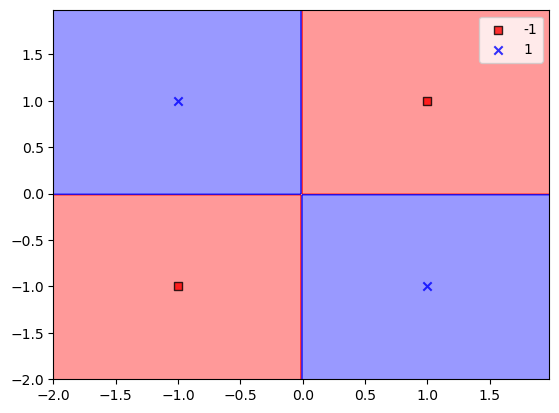

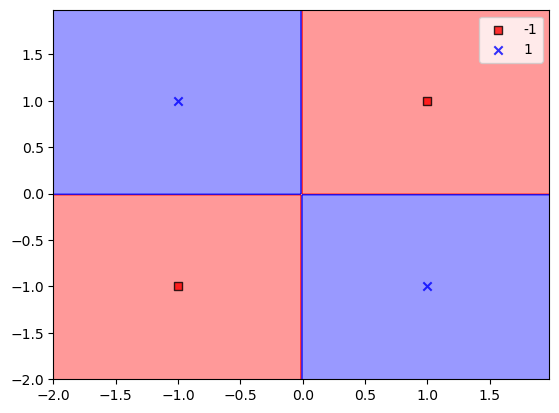

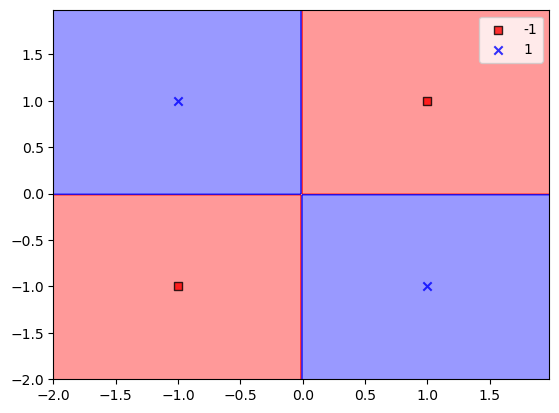

iteration ----------------- 1


In [20]:

W = np.array([0,0,0,0])

X_plot = np.array([[-1,-1],[-1, 1],[1,-1],[1, 1]])
y_plot = np.array([-1, 1, 1, -1])
adjusted = 0 
for i in range(10): 
    adjusted += train(-1,-1,-1 , X_plot = X_plot , y_plot = y_plot) 
    adjusted += train(-1, 1 ,1 , X_plot = X_plot , y_plot = y_plot)
    adjusted += train( 1,-1, 1 ,  X_plot = X_plot , y_plot = y_plot)
    adjusted +=train( 1, 1, -1 ,  X_plot = X_plot , y_plot = y_plot)
    print("iteration -----------------", i) 
    if not adjusted : break 
    adjusted = 0 

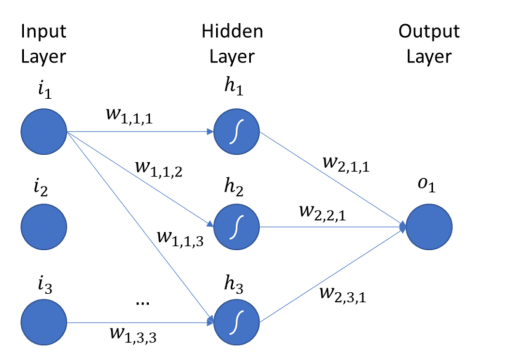

In [25]:
import requests
from PIL import Image
import matplotlib.pyplot as plt
import io

image_url = 'https://playandlearntocode.com/static/siteapp/assets/articles/mlp-1/mlp-1-nodes.png'
response = requests.get(image_url)
image = Image.open(io.BytesIO(response.content)) 
plt.imshow(image)
plt.axis('off')
plt.show() 

In [ ]:
입력을 받는곳을 입력층(input layer) , 그다음 은닉층(hidden layer) , 그다음 출력층(output layer)
각 하나를 노드라고함. ex)x1 ,x2 ,h1,h2

입력층과  출력층 사이는 은닉층으로 판단함.

한층에 대해서 노드수가 많으면 -> 와이드 하다(wide) 라고함 (층의 노드가 많다는 뜻)(보통은닉층에 보고함)

은닉층의 노드를 조절하면서 층의 복잡도를 조절할수있음. 
    노드수가 많아지면 복잡도 상승, 작아지면 복잡도 하강,이걸로 과대적합을 조절할수있음
    
최종은닉층은 출력층으로 가기바로 전단계의 은닉층.
    
모델의 차수를 늘리고 싶으면 층을 여러개 늘리면 됨. 
이게 많이지면 모델이 깊어진다고함( deep 해짐 ) 

그러나 중간에 있는 가중치에대한 정답을 찾을수없음. 그래서
퍼셉트론이 분명 다양한 기능을 수행할 수있지만 , 오류를 줄이고 원하는 기능을 학습할 수 있도록 하는 방법이 없다면
이모델을 훈련 시킬수 없다. ->그래서나온게. 다층퍼셉트론의 학습. 경사 하강법 (gradient descent)


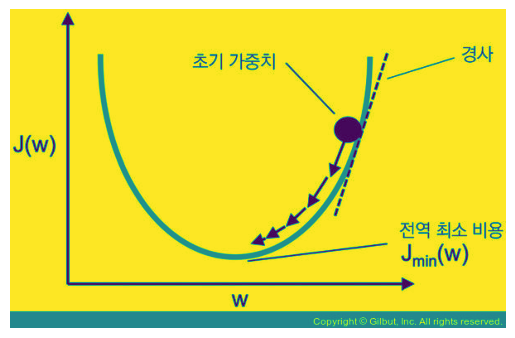

In [30]:
image_url = 'https://blog.kakaocdn.net/dn/rCIEB/btqBoPvGAvz/udkRNs6Vz90lXLWFlCKkk1/img.jpg'
response = requests.get(image_url)
image = Image.open(io.BytesIO(response.content)) 
plt.imshow(image)
plt.axis('off')
plt.show() 

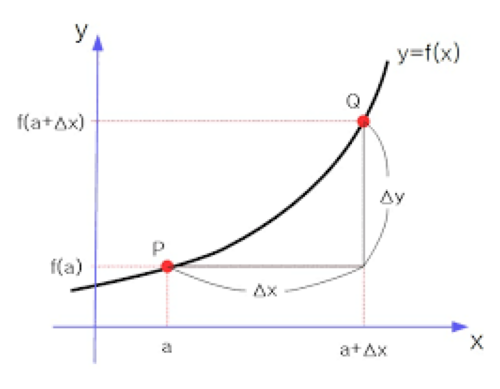

In [31]:
image_url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTfW2qhtO8eyPgGsFTWp3E2sp6rS79M_6DKiw&usqp=CAU'
response = requests.get(image_url)
image = Image.open(io.BytesIO(response.content)) 
plt.imshow(image)
plt.axis('off')
plt.show() 

In [ ]:
미분 (differential) 
    dy 
    --                                                                      2
    dx              dx가 1만큼 증가하는동안 dy 가 2만큼 증가했다  -->       1  ->> 기울기는 2 다. 

더완만한 곳에 가면 
    dy 
    --                                                                       0.5
    dx              dx가 1만큼 증가하는동안 dy 가 0.5만큼 증가했다  -->       1  ->> 기울기는 0.5 다. 

    이렇게 기울기가 점점 작아짐. 

가파른곳으로가면 기울기 커짐
    
    
평평한곳에 가면 
x가 얼만큼걸어가고 y가 얼만큼 낮아졌는지.  이때 y ==0 이고 이럴때는  미분값이 0 이 됨. 



양의 기울기는 x가 증가할때 y 도 증가 
음의 기울기는 x가 증가할때 y 는 감소 



    
위에게 학습의 원리. 

In [ ]:
E = 1/2 * (y-t)^2   평균제곱 오차 (MSE)


In [ ]:
다중퍼셉트론의 경우 

손실함수 L 이 W 에 대해서 계단함수를 쓰면 아무리 미분해도 기울기가 0 이 되버리니깐 w 가 꿈쩍도 안할것임.

그걸 해결해주기위해 시그모이드 또는 로지스틱 함수를 활성화함수로 도입. 
(부드럽게 함수가 올라가는형태 (기울기만들어줌))



In [ ]:
오차 역전파(Backpropagation) 

1, 순전판 (Forward Propagation)  : 순방향으로 계산을 수행해 예측 값 얻음
2. 오차계산 :  예측값과 실제 정답사이의 오차 계산 (이 오차는 손실함수)를 사용하여 계산
3. 역전파 : 오차를 역방향으로 전파해 각 가중치와 편향이 오차에 얼마나 기여했는지 계산.
4. 가중치 업데이트 : 계산된 그래디언트를 사용해 가중치와 편향을 업데이트. 일반적으로 경사하강법 알고리즘사용 
    
    x 입력노드 -->   wx   -->    h 은닉노드  --> xh  --> 출력노드
    
y = wh * h = wh * wx * x    

t(실제값) 있으면 E = 1/2 * (y-t)^2 로 계산할수있음. 
    
    
이렇게 되면 

    x 입력노드 -->   wx   -->    h 은닉노드  --> xh  --> 출력노드
                  dE    dWh                       dE
                 --- * ---                       ---
                 dWh    dWx         <----        dwh  <----   E  = n(y-t)^2
                                             
    

In [ ]:
                    dy
y = ax  ->          dx  = a 

                    dy
y = x+ a ->        dx   = 1 


y = x^2 ->         

                 dy
y = 1/x ->       dx  -> 1/-x^2

이런것 검색해 보기 




In [ ]:

x1  - x --- +--+ -------s--------+--------+---------- sum---
w1  /     /    /    (s)      (y)  /     (e) /      (e^2)      E
         /    b                  -t        ㅁ^2
x2  - x /
w2  /

x1, x2: 입력 노드(Input node)로부터의 입력 값입니다. 일반적으로 입력 노드는 데이터의 특성(feature)을 나타냄
w1, w2: 가중치(Weight)입니다. 입력 값에 가중치를 곱하여 은닉층으로 전달,가중치는 모델이 학습 과정에서 조정되는 매개 변수입니다.
x: 은닉층(Hidden layer)의 입력 값입니다. 은닉층은 중간 계산 단계로, 여러 개의 노드와 가중치를 가질 수 있습니다.
s: 은닉층의 활성화 함수(Activation function)를 통과한 값입니다. 활성화 함수는 비선형 변환을 수행하며, 은닉층의 출력을 조정합니다.
b: 편향(Bias)입니다. 편향은 각 노드에 더해지는 고정된 값으로, 모델이 데이터를 더 잘 표현할 수 있도록 합니다.
y: 출력 노드(Output node)의 예측 값입니다. 보통 모델의 최종 출력을 나타냅니다.
t: 실제 값(Target)입니다. 예측된 출력과 비교하여 손실 함수를 계산하는데 사용됩니다.
e: 오차(Error)입니다. 실제 값과 예측 값의 차이를 나타냅니다.
sum: 오차의 제곱을 계산하여 손실 함수를 구합니다.
E: 손실 함수(Loss function)의 값입니다. 주어진 예시에서는 오차의 제곱을 1/2로 나눈 평균 제곱 오차를 사용하고 있습니다.
    
    
          
         (a1)(a)      (sigmoid)
x1  - x ---+---+ -------s--------+--------+---------- sum--
w1  /     /    /    (s)      (y)  /     (e) /      (e^2)      E
         /    b                  -t        ㅁ^2
x2  - x /(a2)
w2  /

                                                                        
아래 그림 퍼셉트론 1개  오차역전파

#### from PIL import Image
import matplotlib.pyplot as plt 
image_path = "C:/Users/carlo/Desktop/AI_CWNU/documents/backpropagation.jpg"
image = Image.open(image_path)

plt.figure(figsize = (13,6))
plt.imshow(image)
plt.axis('off')
plt.show()

# -0.05 부분에 0.1 이여야함. 그래서 다 바뀌는걸 한번계산해보기. 

In [ ]:
e 는 자연상수. 검색해보기 